In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [2]:
df = pd.read_csv("churn_train.csv")

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# EDA

In [4]:
df.shape

(4250, 20)

In [5]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [9]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [10]:
col_objects = df.columns[df.dtypes=='object']

C:\Users\KIRPAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


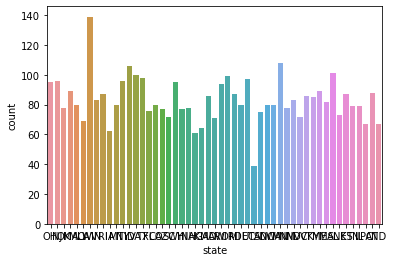

C:\Users\KIRPAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


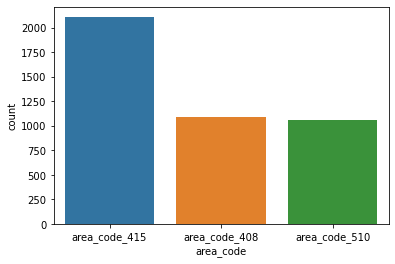

C:\Users\KIRPAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


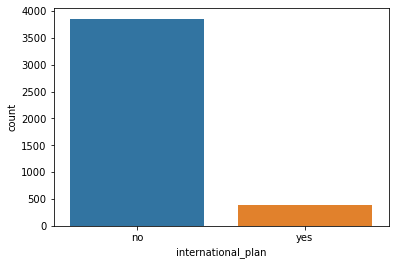

C:\Users\KIRPAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


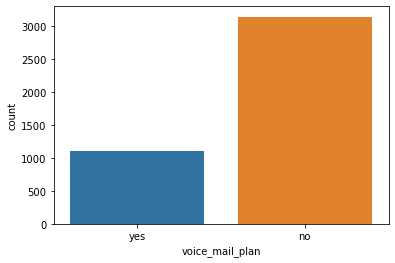

C:\Users\KIRPAL SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


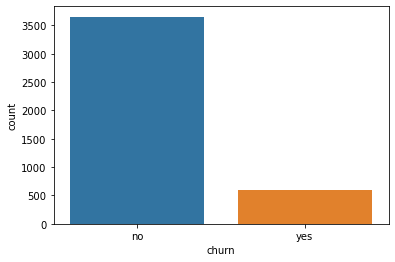

In [12]:
for i in col_objects:
    sns.countplot(df[i])
    plt.show()

As we can see that the target variable churn is unbalanced. For this problem i will let it as it is and move to the forward steps

In [13]:
df = df.drop(["state"],axis=1)

I am dropping the state feature as i think it will not much help in the prediction and moreover to reduce the complexity of the categorical feature

In [14]:
le = LabelEncoder()
df["area_code"] = le.fit_transform(df["area_code"])
df["international_plan"] = le.fit_transform(df["international_plan"])
df["voice_mail_plan"] = le.fit_transform(df["voice_mail_plan"])
df["churn"] = le.fit_transform(df["churn"])

Encoding the categorical variables

<AxesSubplot:>

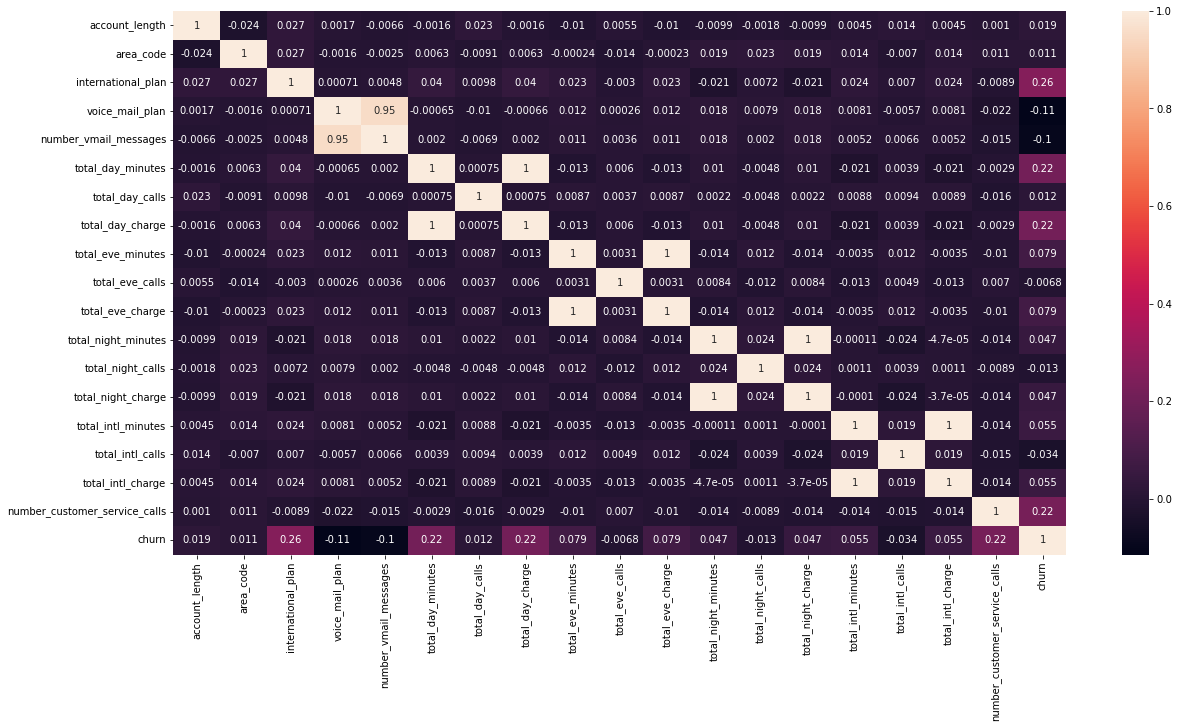

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

we can see that total_eve_calls is the least correlated with the target variable and international_plan is the highest correlated with target.

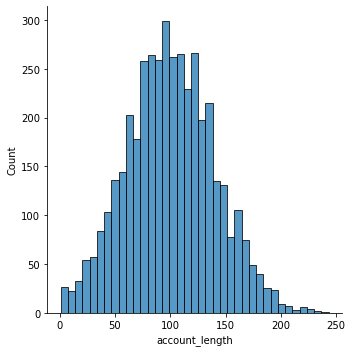

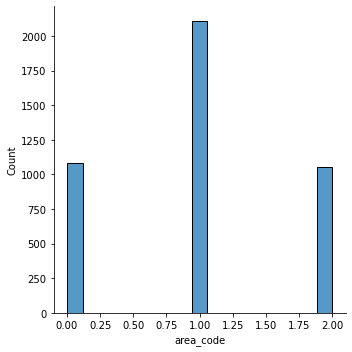

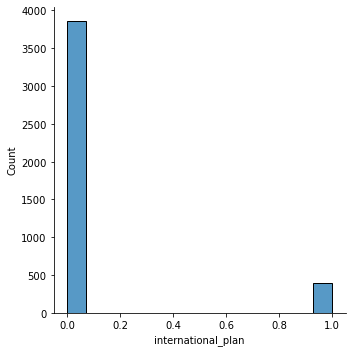

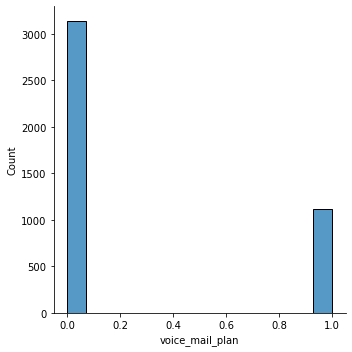

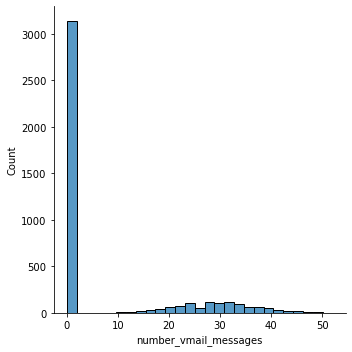

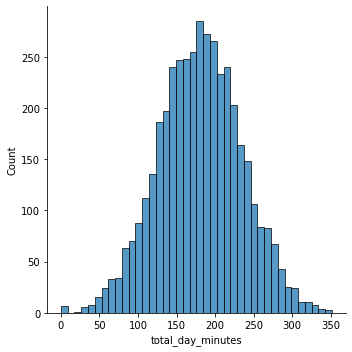

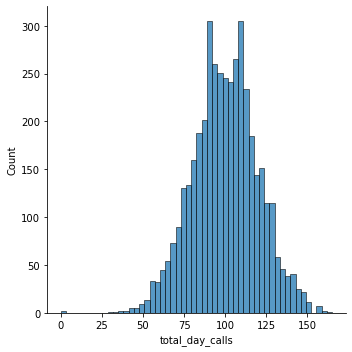

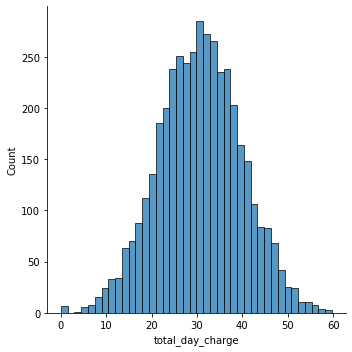

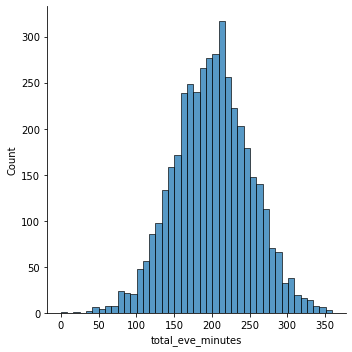

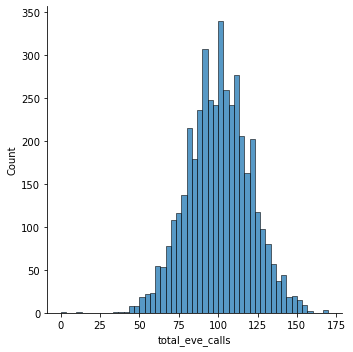

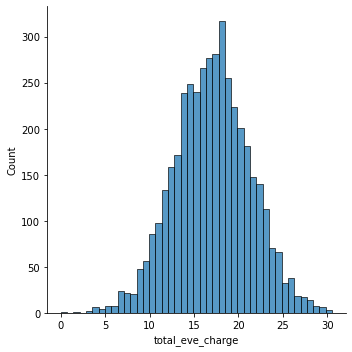

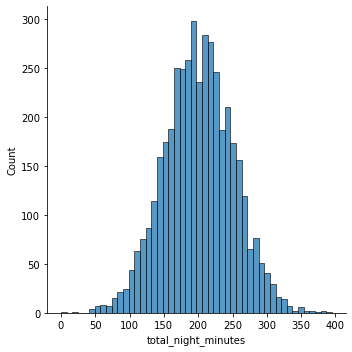

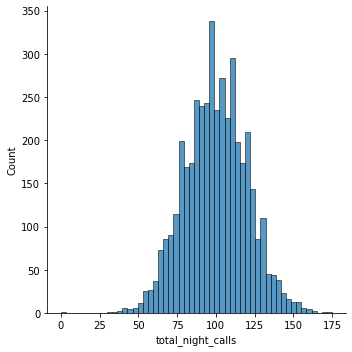

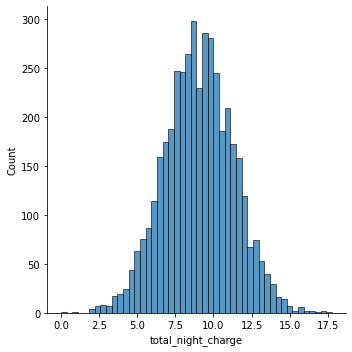

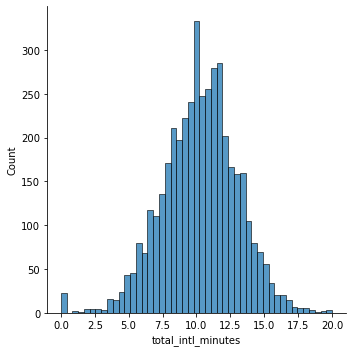

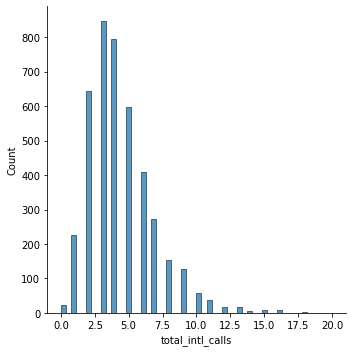

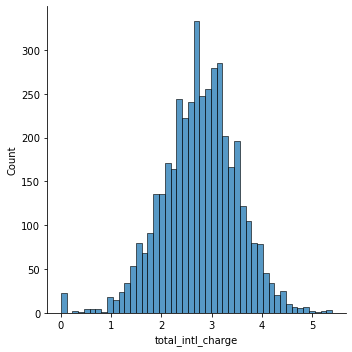

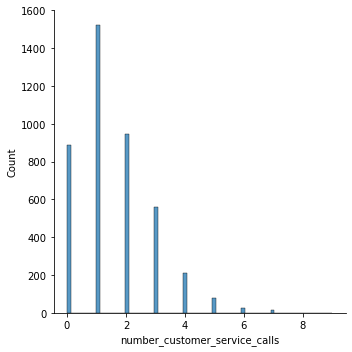

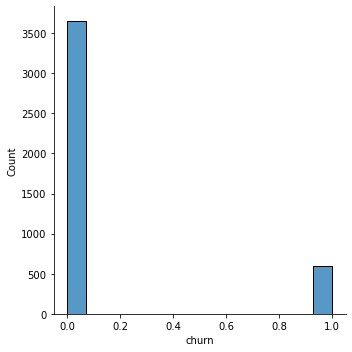

In [16]:
for i in df.columns:
    sns.displot(df[i])
plt.show()

# Splitting the data into train,test,validation

In [17]:
df.shape

(4250, 19)

In [18]:
x = df.iloc[:,:18]

In [19]:
y = df.iloc[:,18]

In [20]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [21]:
x_train,x_rem,y_train,y_rem = train_test_split(x,y,test_size=0.3,random_state=201)
x_test,x_val,y_test,y_val = train_test_split(x_rem,y_rem,test_size=0.5,random_state=166)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(2975, 18)
(2975,)
(637, 18)
(637,)
(638, 18)
(638,)


# Model building

In [23]:
model = Sequential()
model.add(Dense(19,activation="relu",input_shape=(18,)))
model.add(Dropout(0.1))
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="relu"))

In [24]:
model.compile(optimizer="adam",loss='mse',metrics=['accuracy'])

In [25]:
history = model.fit(x_train,y_train,epochs=400,validation_data=(x_val,y_val))

Epoch 1/400
93/93 [==============================] - 1s 6ms/step - loss: 0.1343 - accuracy: 0.8366 - val_loss: 0.1508 - val_accuracy: 0.8464
Epoch 2/400
93/93 [==============================] - 0s 4ms/step - loss: 0.1253 - accuracy: 0.7765 - val_loss: 0.1089 - val_accuracy: 0.7853
Epoch 3/400
93/93 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 0.7630 - val_loss: 0.1006 - val_accuracy: 0.7226
Epoch 4/400
93/93 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.6605 - val_loss: 0.0957 - val_accuracy: 0.7712
Epoch 5/400
93/93 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.7059 - val_loss: 0.0822 - val_accuracy: 0.7163
Epoch 6/400
93/93 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.7055 - val_loss: 0.0844 - val_accuracy: 0.7696
Epoch 7/400
93/93 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.7334 - val_loss: 0.0715 - val_accuracy: 0.7602
Epoch 8/400
9

# plotting the loss and accuracy curves

Text(0, 0.5, 'loss')

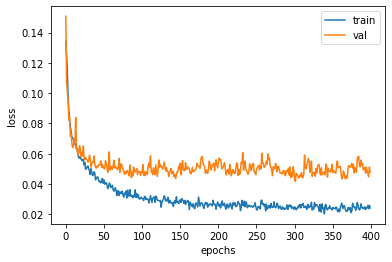

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train","val"])
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

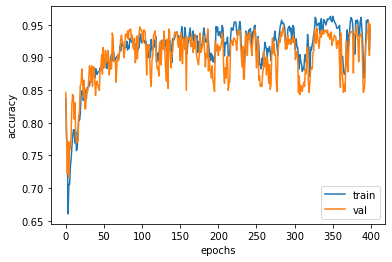

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["train","val"])
plt.xlabel("epochs")
plt.ylabel("accuracy")

# Evaluating the model

In [28]:
model.evaluate(x_test,y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9341


[0.04101165011525154, 0.9340659379959106]

In [29]:
df.s

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [30]:
df.to_csv("churn input.csv")